# Imports

In [1]:
import pandas as pd
import numpy as np
import os, sys, time
import matplotlib.pyplot as plt
import seaborn as sns

from bs4 import BeautifulSoup

# Graphics and options

In [2]:
sns.set()

# Loading data

In [3]:
data = "./data/source/"
os.listdir(data)

['QueryResults.csv']

In [4]:
fn = data + 'QueryResults.csv'
df = pd.read_csv(fn)
df.head()

,Title,Body,Tags,Id,Score,ViewCount,FavoriteCount,AnswerCount
0,How do I delete a Git branch locally and remot...,<p>Failed Attempts to Delete a Remote Branch:<...,<git><version-control><git-branch><git-push><g...,2003505,20307,11155154,0.0,41
1,How can I find all files containing a specific...,<p>How do I find all files containing a specif...,<linux><text><grep><directory><find>,16956810,7359,10526168,0.0,56
2,"How do I force ""git pull"" to overwrite local f...",<p>How do I force an overwrite of local files ...,<git><version-control><overwrite><git-pull><gi...,1125968,9452,8018986,0.0,53
3,How do I check if a string contains a specific...,<p>Consider:</p>\n\n<pre><code>$a = 'How are y...,<php><string><substring><contains><string-matc...,4366730,2657,6591981,0.0,36
4,"Why does my JavaScript code receive a ""No 'Acc...",<blockquote>\n<p><strong>Mod note</strong>: Th...,<javascript><jquery><cors><postman><same-origi...,20035101,3268,6147965,0.0,15


In [5]:
df['FavoriteCount'].value_counts()

FavoriteCount
0.0     48307
1.0         5
32.0        1
Name: count, dtype: int64

In [6]:
df = df.iloc[:,0:4]
df.head()

,Title,Body,Tags,Id
0,How do I delete a Git branch locally and remot...,<p>Failed Attempts to Delete a Remote Branch:<...,<git><version-control><git-branch><git-push><g...,2003505
1,How can I find all files containing a specific...,<p>How do I find all files containing a specif...,<linux><text><grep><directory><find>,16956810
2,"How do I force ""git pull"" to overwrite local f...",<p>How do I force an overwrite of local files ...,<git><version-control><overwrite><git-pull><gi...,1125968
3,How do I check if a string contains a specific...,<p>Consider:</p>\n\n<pre><code>$a = 'How are y...,<php><string><substring><contains><string-matc...,4366730
4,"Why does my JavaScript code receive a ""No 'Acc...",<blockquote>\n<p><strong>Mod note</strong>: Th...,<javascript><jquery><cors><postman><same-origi...,20035101


# Body without code

In [7]:
df["Body_wo_code"] = ''
for ligne in range(len(df)):
    soup = BeautifulSoup(df['Body'][df.index[ligne]], 'lxml')
    element_list = soup.find("p")
    if element_list :
        for element in element_list:
            df.loc[df.index[ligne],'Body_wo_code']  += element.get_text()+" "
        else :
            df.loc[df.index[ligne],'Body_wo_code']  += ""

# join Title & body

In [8]:
df['Title_body'] = df['Title']+ ' ' + df['Body_wo_code']

# First Tour
## Display

In [9]:
df.head()

,Title,Body,Tags,Id,Body_wo_code,Title_body
0,How do I delete a Git branch locally and remot...,<p>Failed Attempts to Delete a Remote Branch:<...,<git><version-control><git-branch><git-push><g...,2003505,Failed Attempts to Delete a Remote Branch:,How do I delete a Git branch locally and remot...
1,How can I find all files containing a specific...,<p>How do I find all files containing a specif...,<linux><text><grep><directory><find>,16956810,How do I find all files containing a specific ...,How can I find all files containing a specific...
2,"How do I force ""git pull"" to overwrite local f...",<p>How do I force an overwrite of local files ...,<git><version-control><overwrite><git-pull><gi...,1125968,How do I force an overwrite of local files on ...,"How do I force ""git pull"" to overwrite local f..."
3,How do I check if a string contains a specific...,<p>Consider:</p>\n\n<pre><code>$a = 'How are y...,<php><string><substring><contains><string-matc...,4366730,Consider:,How do I check if a string contains a specific...
4,"Why does my JavaScript code receive a ""No 'Acc...",<blockquote>\n<p><strong>Mod note</strong>: Th...,<javascript><jquery><cors><postman><same-origi...,20035101,Mod note : This question is about why XMLHttp...,"Why does my JavaScript code receive a ""No 'Acc..."


In [10]:
df.tail()

,Title,Body,Tags,Id,Body_wo_code,Title_body
49995,Problem about Background transparent .png form...,<p>I'm studying on OpenCV with Python. I tried...,<python><python-3.x><image><opencv><png>,53380318,I'm studying on OpenCV with Python. I tried to...,Problem about Background transparent .png form...
49996,How I get the HTTP responses from bash script ...,<p>I have the following command that I execute...,<linux><bash><http><curl><sh>,33300021,I have the following command that I execute fr...,How I get the HTTP responses from bash script ...
49997,Cannot cast type numeric to boolean,<pre><code>ALTER TABLE products ALTER COLUMN p...,<sql><postgresql><casting><ddl><alter-table>,19290248,Postgres gives me this error:,Cannot cast type numeric to boolean Postgres g...
49998,Sqlalchemy - add columns to a query,"<p>For example I am using the <a href=""https:/...",<python><python-3.x><flask><sqlalchemy><flask-...,41603584,For example I am using the chinook database ...,Sqlalchemy - add columns to a query For exampl...
49999,Xcode 4.2 iOS Empty Application and storyboards,"<p>I'm an Xcode newbie, and I'm trying to make...",<ios><xcode><ios5><storyboard><xcode4.2>,7906541,"I'm an Xcode newbie, and I'm trying to make my...",Xcode 4.2 iOS Empty Application and storyboard...


In [11]:
df.sample(10)

,Title,Body,Tags,Id,Body_wo_code,Title_body
15690,Writing a video file using H.264 compression i...,<p>How do I write a video using H.264 compress...,<c++><opencv><image-processing><computer-visio...,28163201,How do I write a video using H.264 compression...,Writing a video file using H.264 compression i...
25369,Setting A CGContext Transparent Background,<p>I am still struggling with drawing a line w...,<iphone><graphics><background><transparent><cg...,2125543,I am still struggling with drawing a line with...,Setting A CGContext Transparent Background I a...
28862,Comments in SSRS Report Expressions,<p>I'm using some complicated expressions in R...,<sql-server><sql-server-2008><reporting-servic...,886008,I'm using some complicated expressions in Repo...,Comments in SSRS Report Expressions I'm using ...
14612,How do I reduce the inner padding around the t...,"<p><img src=""https://i.stack.imgur.com/f2NU8.p...",<java><android><xml><mobile><user-interface>,16394252,,How do I reduce the inner padding around the t...
20936,Checking if a variable is empty c#,<p>I have a pretty basic question but it is do...,<c#><.net><linq><variables><null>,6383295,I have a pretty basic question but it is doing...,Checking if a variable is empty c# I have a pr...
23257,How to apply a saved chart template to an exis...,<p>I recently created a custom contour chart i...,<excel><templates><charts><contour><excel-2011>,17386777,I recently created a custom contour chart in e...,How to apply a saved chart template to an exis...
33115,Convert byte string to base64-encoded string (...,<p>I was wondering if it is possible to conver...,<python><string><python-3.x><base64><data-uri>,33269020,I was wondering if it is possible to convert a...,Convert byte string to base64-encoded string (...
14284,Why we should not use protected static in java,"<p>I was going through this question <a href=""...",<java><oop><inheritance><static><protected>,24289070,I was going through this question Is there a ...,Why we should not use protected static in java...
31642,OpenCV return keypoints coordinates and area f...,<p>I followed a blob detection example (using ...,<python><opencv><image-processing><blob><keypo...,30807214,I followed a blob detection example (using cv...,OpenCV return keypoints coordinates and area f...
35823,"Sass import error in Rails 3 app - ""File to im...",<p>I have a Rails 3 app on which I successfull...,<ruby-on-rails><ruby-on-rails-3><sass><compass...,6005361,I have a Rails 3 app on which I successfully r...,"Sass import error in Rails 3 app - ""File to im..."


## Structure

In [12]:
df.shape

(50000, 6)

In [13]:
df.dtypes

Title           object
Body            object
Tags            object
Id               int64
Body_wo_code    object
Title_body      object
dtype: object

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Title         50000 non-null  object
 1   Body          50000 non-null  object
 2   Tags          50000 non-null  object
 3   Id            50000 non-null  int64 
 4   Body_wo_code  50000 non-null  object
 5   Title_body    50000 non-null  object
dtypes: int64(1), object(5)
memory usage: 2.3+ MB


In [15]:
df.dtypes.value_counts()

object    5
int64     1
Name: count, dtype: int64

In [16]:
df.nunique()

Title           49998
Body            50000
Tags            48232
Id              50000
Body_wo_code    49611
Title_body      50000
dtype: int64

## NaN and duplicated

In [17]:
df.isna().sum()

Title           0
Body            0
Tags            0
Id              0
Body_wo_code    0
Title_body      0
dtype: int64

In [18]:
df.isna().mean()

Title           0.0
Body            0.0
Tags            0.0
Id              0.0
Body_wo_code    0.0
Title_body      0.0
dtype: float64

In [19]:
for col in df.columns :
    n = df.duplicated(subset=col).sum()
    print(f"col : {col} -> duplicated : {n}")

col : Title -> duplicated : 2
col : Body -> duplicated : 0
col : Tags -> duplicated : 1768
col : Id -> duplicated : 0
col : Body_wo_code -> duplicated : 389
col : Title_body -> duplicated : 0


In [20]:
#df.duplicated(subset="text", keep="first")

In [21]:
#idx = df.duplicated(subset="text", keep="first")
#df.loc[idx, : ].sort_values("text")

## Data inspection

In [22]:
df.describe(include=np.number)

,Id
count,5.000000e+04
mean,2.201551e+07
std,1.775371e+07
min,4.000000e+00
25%,6.714152e+06
50%,1.792924e+07
75%,3.445893e+07
max,7.643531e+07


In [23]:
df.describe(include=object)

,Title,Body,Tags,Body_wo_code,Title_body
count,50000,50000,50000,50000,50000
unique,49998,50000,48232,49611,50000
top,A potentially dangerous Request.Form value was...,<p>Failed Attempts to Delete a Remote Branch:<...,<javascript><jquery><html><css><twitter-bootst...,,How do I delete a Git branch locally and remot...
freq,2,1,53,67,1


# Cleaning
## Select columns

In [24]:
tmp = df.dtypes
tmp

Title           object
Body            object
Tags            object
Id               int64
Body_wo_code    object
Title_body      object
dtype: object

## Drop NaN

In [25]:
df.isna().mean()

Title           0.0
Body            0.0
Tags            0.0
Id              0.0
Body_wo_code    0.0
Title_body      0.0
dtype: float64

## Duplicated

In [26]:
df.shape

(50000, 6)

# Exploratory Data Analysis

In [27]:
df.describe()

,Id
count,5.000000e+04
mean,2.201551e+07
std,1.775371e+07
min,4.000000e+00
25%,6.714152e+06
50%,1.792924e+07
75%,3.445893e+07
max,7.643531e+07


In [28]:
# df.Tags.value_counts().plot(kind="pie")

## Length

In [29]:
df.describe(include="object")

,Title,Body,Tags,Body_wo_code,Title_body
count,50000,50000,50000,50000,50000
unique,49998,50000,48232,49611,50000
top,A potentially dangerous Request.Form value was...,<p>Failed Attempts to Delete a Remote Branch:<...,<javascript><jquery><html><css><twitter-bootst...,,How do I delete a Git branch locally and remot...
freq,2,1,53,67,1


In [30]:
df.Title_body.apply(lambda i : len(i))

0         94
1        160
2        187
3         63
4        460
        ... 
49995    244
49996    125
49997     67
49998    182
49999    297
Name: Title_body, Length: 50000, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

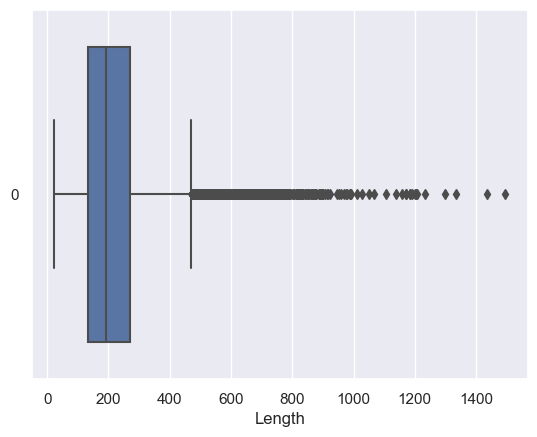

In [31]:
tmp = df.Title_body.str.len()
sns.boxplot(tmp, orient='h')
plt.xlabel('Length')
plt.show

C:\Users\Sebastien\anaconda3\envs\Downgrade_python\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<function matplotlib.pyplot.show(close=None, block=None)>

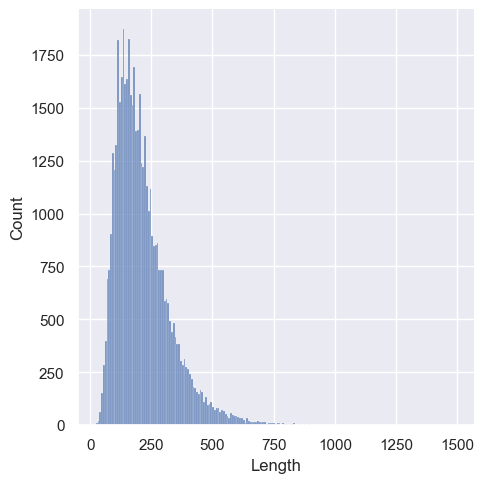

In [32]:
sns.displot(tmp)
plt.xlabel('Length')
plt.show

In [33]:
df["_len_txt"] = tmp

In [34]:
df.head()

,Title,Body,Tags,Id,Body_wo_code,Title_body,_len_txt
0,How do I delete a Git branch locally and remot...,<p>Failed Attempts to Delete a Remote Branch:<...,<git><version-control><git-branch><git-push><g...,2003505,Failed Attempts to Delete a Remote Branch:,How do I delete a Git branch locally and remot...,94
1,How can I find all files containing a specific...,<p>How do I find all files containing a specif...,<linux><text><grep><directory><find>,16956810,How do I find all files containing a specific ...,How can I find all files containing a specific...,160
2,"How do I force ""git pull"" to overwrite local f...",<p>How do I force an overwrite of local files ...,<git><version-control><overwrite><git-pull><gi...,1125968,How do I force an overwrite of local files on ...,"How do I force ""git pull"" to overwrite local f...",187
3,How do I check if a string contains a specific...,<p>Consider:</p>\n\n<pre><code>$a = 'How are y...,<php><string><substring><contains><string-matc...,4366730,Consider:,How do I check if a string contains a specific...,63
4,"Why does my JavaScript code receive a ""No 'Acc...",<blockquote>\n<p><strong>Mod note</strong>: Th...,<javascript><jquery><cors><postman><same-origi...,20035101,Mod note : This question is about why XMLHttp...,"Why does my JavaScript code receive a ""No 'Acc...",460


In [35]:
df.sort_values("_len_txt").head(10)

,Title,Body,Tags,Id,Body_wo_code,Title_body,_len_txt
35974,Android Splash Screen,"<p><img src=""https://i.stack.imgur.com/4O5Ks.p...",<java><android><xml><android-layout><splash-sc...,15452061,,Android Splash Screen,23
25302,Is auto_ptr deprecated?,<ol>\n<li>Will auto_ptr be deprecated in incom...,<c++><standards><smart-pointers><auto-ptr><uni...,2404115,,Is auto_ptr deprecated?,24
20158,WPF Get parent window,"<p>Hy,</p>\n\n<p>In my MainWindow.xaml.cs file...",<c#><.net><wpf><xaml><parent>,22856745,"Hy,","WPF Get parent window Hy,",26
1920,What is The Rule of Three?,<ul>\n<li>What does <em>copying an object</em>...,<c++><copy-constructor><assignment-operator><c...,4172722,,What is The Rule of Three?,27
15167,AuthenticateRequest event,<p><br></p>\n\n<p>Q 1. To my understanding <co...,<c#><asp.net><authentication><forms-authentica...,875472,,AuthenticateRequest event,27
49978,Heap vs Stack vs Perm Space,<ul>\n<li>What are the differences between the...,<java><memory><jvm><heap-memory><stack-memory>,6801676,,Heap vs Stack vs Perm Space,28
8726,C# Clear Session,<p><strong>Question #1</strong></p>\n\n<p>I wa...,<c#><.net><asp.net><session><page-lifecycle>,6640350,Question #1,C# Clear Session Question #1,29
15969,Update from Temp Table,"<p>Query:</p>\n\n<pre><code>SELECT ID, T.c.val...",<sql><sql-server><t-sql><sql-update><temp-tables>,15118834,Query:,Update from Temp Table Query:,30
26875,vue.js put focus on input,"<p>HTML</p>\n\n<pre class=""lang-html prettypri...",<javascript><html><vue.js><input><focus>,52088691,HTML,vue.js put focus on input HTML,31
36540,Open popup at clicked position,"<p><p>Hi,\n<p>\n I have done a popup which is...",<javascript><jquery><html><popup><mouse-position>,10492910,,Open popup at clicked position,31


In [36]:
df.sort_values("_len_txt").tail(10)

,Title,Body,Tags,Id,Body_wo_code,Title_body,_len_txt
27674,Vue-router reload components,<p>I have a few routes that each load 3 compon...,<javascript><node.js><vue.js><vue-component><v...,41305573,I have a few routes that each load 3 component...,Vue-router reload components I have a few rout...,1185
26821,"GCP Kubernetes workload ""Does not have minimum...",<p><strong>Background</strong>: I'm trying to ...,<docker><kubernetes><google-cloud-platform><go...,53452120,Background : I'm trying to set up a Bitcoin Co...,"GCP Kubernetes workload ""Does not have minimum...",1190
20216,Jersey: A message body writer for Java Class a...,<p>after trying to figure out what's my proble...,<eclipse><json><jersey><message><mime>,13439386,after trying to figure out what's my problem I...,Jersey: A message body writer for Java Class a...,1202
11035,the behavior of the UICollectionViewFlowLayout...,<blockquote>\n<p>2015-08-18 16:07:51.523 Examp...,<uicollectionview><ios9><uicollectionviewcell>...,32082726,2015-08-18 16:07:51.523 Example[16070:269647] ...,the behavior of the UICollectionViewFlowLayout...,1203
49061,Why was Cassandra written in Java?,"<p>Question about <a href=""http://en.wikipedia...",<java><c++><c><database-design><cassandra>,2341866,Question about Cassandra \n \n \nWhy the he...,Why was Cassandra written in Java? Question ab...,1206
28073,Communicating between iOS and Android with Blu...,<p>I've got a working app using CoreBluetooth ...,<ios><core-bluetooth><bluetooth-lowenergy><and...,18410081,I've got a working app using CoreBluetooth to ...,Communicating between iOS and Android with Blu...,1233
26809,How do you connect Java backend with html/css ...,"<p>Hi I know the language of HTML, CSS, and Ja...",<java><html><css><frontend><backend>,50671420,"Hi I know the language of HTML, CSS, and Java ...",How do you connect Java backend with html/css ...,1300
47112,listFiles() returns null when it shouldn't. It...,<pre><code>public static void main(String[] ar...,<java><batch-file><jar><nullpointerexception><...,20347161,This code changes the background image of the ...,listFiles() returns null when it shouldn't. It...,1334
20748,HTML.Textarea Values in MVC Razor View,<p>It is hard for me to clearly state the prob...,<c#><html><asp.net-mvc><razor><model-binding>,16575560,It is hard for me to clearly state the problem...,HTML.Textarea Values in MVC Razor View It is h...,1436
11289,Enable USB debugging through Clockworkmod with...,"<p>So, a few days ago my Nexus 7 got dropped, ...",<android><adb><root><touchscreen><nexus-7>,13326806,"So, a few days ago my Nexus 7 got dropped, and...",Enable USB debugging through Clockworkmod with...,1495


In [37]:
#df.drop(columns="_len_txt", inplace=True)
#df.head()

In [38]:
#df.to_csv("data/cleaned/df_cleaned.csv", index=False)

# Text Processing

In [39]:
#NLP
import nltk
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.tokenize import word_tokenize, wordpunct_tokenize, RegexpTokenizer
from nltk.corpus import words, stopwords

from wordcloud import WordCloud
from PIL import Image

#import plotly as px
from pandarallel import pandarallel

In [40]:
stop_words = set(stopwords.words('english'))

In [41]:
def display_tokens_info(tokens) :
    """display info about corpus """
    
    print(f"nb tokens {len(tokens)}, nb tokens uniques {len(set(tokens))}")
    print(tokens[:30])

def process_text(doc,
                   rejoin=True,
                   lemm_or_stemm="stem",
                   list_rare_words=None,
                   min_len_word=3,
                   force_is_alpha=True,
                   eng_words= None,
                   extra_words= stop_words) :
    
    from nltk.tokenize import word_tokenize, wordpunct_tokenize, RegexpTokenizer
    from nltk.corpus import words, stopwords
    from nltk.stem import WordNetLemmatizer, PorterStemmer
    
    stop_words = set(stopwords.words('english'))
    
    """cf process_text_1 but with list_unique_words, min_len_word and force_is_alpha
    
    positional arguments :
    ----------------------
    doc : str : the document (aka a text in str format) to process
    
    opt args :
    ----------------------
    rejoin : bool : if True return a string else return the list of tokens - default = False
    lemm_or_stemm : str : if lem do lemmentize else stemmentize - default = stemmentize
    list_rare_words : list : a list of rare wrods to exclude - default = None
    min_len__word : int : the minimum length of wrods to not exlude - default = 3
    force_is_alpha : int : if 1, exclude all tokens with a numeric character - default = True
    eng_words : list : list of english words - default = None
    extra_words : list : exclude an extra list - default = None
    
    return :
    ----------------------
    a string (if rejoin is True) or a list of tokens
    """
    
    # list_unique_words
    if not list_rare_words:
        list_rare_words = []
        
    # lower
    doc = doc.lower().strip()
    
    # tokenize
    tokenizer = RegexpTokenizer(r"\w+")
    raw_tokens_list = tokenizer.tokenize(doc)
    
    # classics stop words
    cleaned_tokens_list = [w for w in raw_tokens_list if w not in stop_words]
    
    #####################################################
    #####################################################
    
    # no rare tokens
    non_rare_tokens = [w for w in cleaned_tokens_list if w not in list_rare_words]
    
    # no more len words
    more_than_N = [w for w in non_rare_tokens if len(w) >= min_len_word ]
    
    # only alpha chars
    if force_is_alpha :
        alpha_tokens = [w for w in more_than_N if w.isalpha()]
    else :
        alpha_tokens = more_than_N
        
    #####################################################
    #####################################################
    
    # stem or lem
    if lemm_or_stemm == "lem" :
        trans = WordNetLemmatizer()
        trans_text = [trans.lemmatize(i) for i in alpha_tokens ]
    else:
        trans = PorterStemmer()
        trans_text = [trans.stem(i) for i in alpha_tokens ]
    
    #####################################################
    #####################################################
    
    # in english
    if eng_words :
        engl_text = [i for i in trans_text if i in eng_words]
    else:
        engl_text = trans_text    
    
    #####################################################
    #####################################################
    
    # drop extra_words tokens
    if extra_words :
        final = [w for w in engl_text if w not in extra_words]
    else:
        final = engl_text
    
    #####################################################
    #####################################################
    
    # manage return type
    if rejoin :
        return " ".join(final)
    
#    return final  
    return trans_text

## Clean_title_body

In [42]:
# pandarallel

pandarallel.initialize(progress_bar=True,
                      nb_workers=6,
                      verbose=2,
                      )

INFO: Pandarallel will run on 6 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.

https://nalepae.github.io/pandarallel/troubleshooting/


In [43]:
df["first_clean"] = df.Title_body.parallel_apply(process_text)


In [44]:
df.sample(10)

,Title,Body,Tags,Id,Body_wo_code,Title_body,_len_txt,first_clean
21071,Pass command-line arguments to Startup class i...,<p>I have arguments passed in via the command-...,<asp.net><.net><asp.net-core><owin><katana>,45219949,I have arguments passed in via the command-line,Pass command-line arguments to Startup class i...,109,pass command line argument startup class asp n...
31587,How to use the I18n fallback features in Rails 3,<p>I am getting an &quot;translation missing&q...,<ruby-on-rails><ruby-on-rails-3><international...,4223806,"I am getting an ""translation missing"" error me...",How to use the I18n fallback features in Rails...,115,use fallback featur rail get translat miss err...
44022,Telerik Kendo MVC TextBox Multiline Mode,<p>Does anyone know what properties to set to ...,<razor><textbox><kendo-asp.net-mvc><multiline>...,34904991,Does anyone know what properties to set to mak...,Telerik Kendo MVC TextBox Multiline Mode Does ...,120,telerik kendo mvc textbox multilin mode anyon ...
41172,What can explain std::cout not to display anyt...,"<p>For whatever reason, std::cout does not dis...",<c++><visual-studio><qt><qt-creator><cout>,2627900,"For whatever reason, std::cout does not displa...",What can explain std::cout not to display anyt...,185,explain std cout display anyth whatev reason s...
48502,Calculating and creating percentage column fro...,<p>I have a df (<code>Apple_farm</code>) and n...,<python><string><pandas><dataframe><percentage>,36332147,I have a df ( Apple_farm ) and need to calcula...,Calculating and creating percentage column fro...,290,calcul creat percentag column two column need ...
32023,How can I host my own private conda repository?,<p>I have a few python projects that are depen...,<python><pip><anaconda><pypi><conda>,35359147,I have a few python projects that are dependen...,How can I host my own private conda repository...,491,host privat conda repositori python project de...
20865,SYNTAX_ERR: DOM Exception 12 - Hmmm,<p>I have been working on a small slideshow / ...,<javascript><html><dom><syntax-error><domexcep...,7315162,I have been working on a small slideshow / pub...,SYNTAX_ERR: DOM Exception 12 - Hmmm I have bee...,417,dom except hmmm work small slideshow public di...
15594,Change default color of Link from blue to white,"<p>I am using <a href=""https://www.npmjs.com/p...",<css><reactjs><redux><react-router><react-rout...,46102586,I am using Link component from react-router-...,Change default color of Link from blue to whit...,221,chang default color link blue white use link c...
23110,"What is ""semantic segmentation"" compared to ""s...",<p>Is semantic segmentation just a Pleonasm or...,<image-processing><computer-vision><object-det...,33947823,Is semantic segmentation just a Pleonasm or is...,"What is ""semantic segmentation"" compared to ""s...",261,semant segment compar segment scene label sema...
20502,What is the difference between Flex/Lex and Ya...,<p>What is the difference between Flex &amp; L...,<parsing><bison><yacc><flex-lexer><lex>,623503,What is the difference between Flex & Lex and ...,What is the difference between Flex/Lex and Ya...,183,differ flex lex yacc bison differ flex lex yac...


<function matplotlib.pyplot.show(close=None, block=None)>

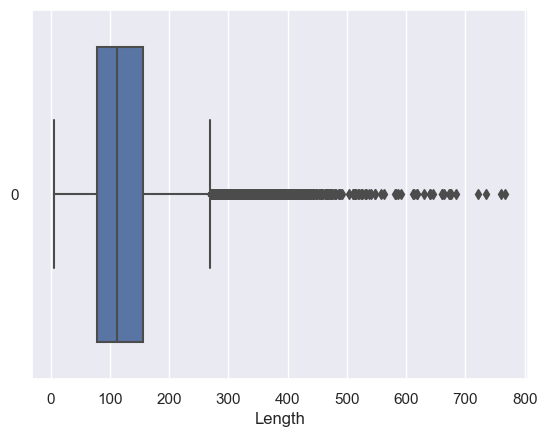

In [45]:
tmp1 = df.first_clean.str.len()
sns.boxplot(tmp1, orient='h')
plt.xlabel('Length')
plt.show

C:\Users\Sebastien\anaconda3\envs\Downgrade_python\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<function matplotlib.pyplot.show(close=None, block=None)>

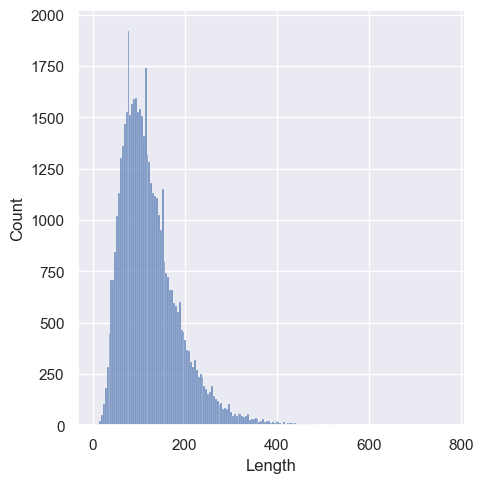

In [46]:
sns.displot(tmp1)
plt.xlabel('Length')
plt.show

In [47]:
#corpus = "".join(df.clean_title_body.values) 
#new_raw_corpus = "".join("".join(l) for l in df.new_text) 
# result = ''.join(''.join(l) for l in my_list)
#display_tokens_info(new_corpus)

In [48]:
corpus = process_text("".join(df.Title_body.values), rejoin=False)
display_tokens_info(corpus)

nb tokens 1002099, nb tokens uniques 22336
['delet', 'git', 'branch', 'local', 'remot', 'fail', 'attempt', 'delet', 'remot', 'branch', 'find', 'file', 'contain', 'specif', 'text', 'string', 'linux', 'find', 'file', 'contain', 'specif', 'string', 'text', 'within', 'file', 'content', 'forc', 'git', 'pull', 'overwrit']


In [49]:
pd.DataFrame(corpus, columns = ['tag']).value_counts()

tag           
use               26255
tri               11128
file              10441
get                9527
work               7511
                  ...  
knot                  1
knownvalu             1
knpsnappybundl        1
koala                 1
ヒッツ                   1
Name: count, Length: 22336, dtype: int64

In [50]:
max_tag = pd.DataFrame(pd.DataFrame(corpus, columns = ['tag']).value_counts(), columns=['count']).reset_index()
max_tag[max_tag['count']>4]

,tag,count
0,use,26255
1,tri,11128
2,file,10441
3,get,9527
4,work,7511
...,...,...
6358,nsimag,5
6359,facebooksdk,5
6360,tokyo,5
6361,typefac,5


In [51]:
def count_words(doc) :
    
    from nltk.tokenize import word_tokenize, wordpunct_tokenize, RegexpTokenizer
    from nltk.corpus import words, stopwords
    from nltk.stem import WordNetLemmatizer, PorterStemmer
    
    stop_words = set(stopwords.words('english'))
    
    """text processing with list_unique_words, min_len_word and force_is_alpha
    
    positional arguments :
    ----------------------
    doc : str : the document (aka a text in str format) to process
    
    opt args :
    ----------------------
    rejoin : bool : if True return a string else return the list of tokens - default = False
    
    return :
    ----------------------
    a string (if rejoin is True) or a list of tokens
    """
 
    # lower
    doc = doc.lower().strip()
    
    # tokenize
    tokenizer = RegexpTokenizer(r"\w+")
    raw_tokens_list = tokenizer.tokenize(doc)
    
    # classics stop words
    cleaned_tokens_list = [w for w in raw_tokens_list if w not in stop_words]
    
    rare_words = pd.Series(cleaned_tokens_list).value_counts()
    
    return rare_words

def list_rare_words_process(doc,
                   count_words) :
    """cf process_text_1 but with list_unique_words, min_len_word and force_is_alpha
    
    positional arguments :
    ----------------------
    doc : str : the document (aka a text in str format) to process
    
    opt args :
    ----------------------
    count_words : int : filter number of counted number - default = 4
    
    return :
    ----------------------
    a list of tokens
    """
    rare_words = doc[doc< count_words]
    
    list_rare_words = list(rare_words.index)
    
    return list_rare_words


In [52]:
raw_corpus = "".join(df.Title_body.values)
raw_corpus[0:1_000]

'How do I delete a Git branch locally and remotely? Failed Attempts to Delete a Remote Branch: How can I find all files containing a specific text (string) on Linux? How do I find all files containing a specific string of text within their file contents? How do I force "git pull" to overwrite local files? How do I force an overwrite of local files on a  git pull ? My local repository contains a file of the same filename as on the server. How do I check if a string contains a specific word? Consider: Why does my JavaScript code receive a "No \'Access-Control-Allow-Origin\' header is present on the requested resource" error, while Postman does not? Mod note : This question is about why  XMLHttpRequest / fetch /etc. on the browser are subject to the Same Access Policy restrictions (you get errors mentioning CORB or CORS) while Postman is not. This question is  not  about how to fix a "No \'Access-Control-Allow-Origin\'..." error. It\'s about why they happen. Renaming column names in Panda

In [53]:
list_rare_words = count_words(raw_corpus)
list_rare_words

using          15830
file            7851
use             7712
trying          7633
like            7069
               ...  
dream              1
containerd         1
intrusion          1
object_type        1
chinook            1
Name: count, Length: 35313, dtype: int64

In [54]:
df_count = pd.DataFrame(list_rare_words, columns= ['count'])

df_count = df_count.groupby('count', sort = False).agg(
    n_words= ('count','count'),     #number of words counted
    ).reset_index()
df_count['n_words_cum'] = df_count['n_words'].cumsum() #cumulated sum of counted words

<function matplotlib.pyplot.show(close=None, block=None)>

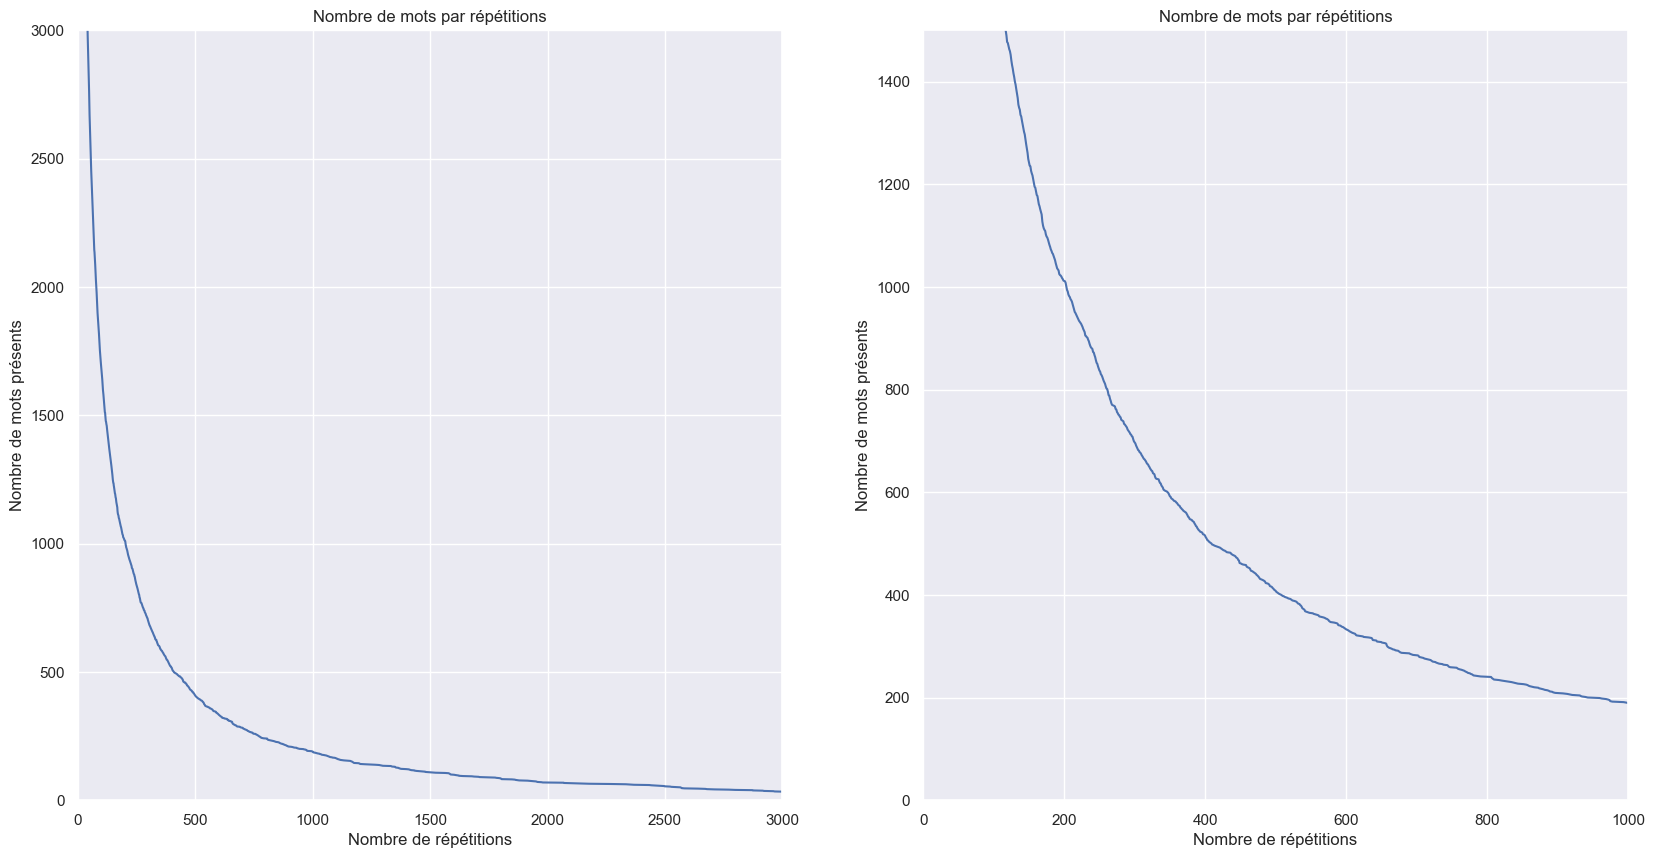

In [55]:
sns.set()
fig = plt.figure(figsize=(20, 10))

ax = fig.add_subplot(1,2,1)
plt.plot(df_count['count'], df_count['n_words_cum'], )
plt.title('Nombre de mots par répétitions')
plt.xlabel('Nombre de répétitions')
plt.ylabel('Nombre de mots présents')
plt.xlim(0,3_000)
plt.ylim(0,3_000)

ax = fig.add_subplot(1,2,2)
plt.plot(df_count['count'], df_count['n_words_cum'], )
plt.title('Nombre de mots par répétitions')
plt.xlabel('Nombre de répétitions')
plt.ylabel('Nombre de mots présents')
plt.xlim(0,1_000)
plt.ylim(0,1_500)
#plt.xticks(np.arange(20, 401, 20))
#plt.xticks(np.arange(20, 401, 10), minor=True)
#plt.grid(True)
plt.grid(which='minor', alpha=0.4)

plt.show


In [56]:
list_rare_words = list_rare_words_process(list_rare_words, 200) #list of words repeated < 1000 times

In [57]:
len(list_rare_words)

34302

In [58]:
# Save list_rare_words in csv file
list_rare_words_df = pd.DataFrame(list_rare_words, columns= ['words_list'])
list_rare_words_df.to_csv("data/cleaned/list_rare_words.csv", index=False)


In [59]:
df["second_clean"] = df.Title_body.parallel_apply(process_text, list_rare_words= list_rare_words)

In [60]:
df

,Title,Body,Tags,Id,Body_wo_code,Title_body,_len_txt,first_clean,second_clean
0,How do I delete a Git branch locally and remot...,<p>Failed Attempts to Delete a Remote Branch:<...,<git><version-control><git-branch><git-push><g...,2003505,Failed Attempts to Delete a Remote Branch:,How do I delete a Git branch locally and remot...,94,delet git branch local remot fail attempt dele...,delet git fail delet remot
1,How can I find all files containing a specific...,<p>How do I find all files containing a specif...,<linux><text><grep><directory><find>,16956810,How do I find all files containing a specific ...,How can I find all files containing a specific...,160,find file contain specif text string linux fin...,find file contain specif text string linux fin...
2,"How do I force ""git pull"" to overwrite local f...",<p>How do I force an overwrite of local files ...,<git><version-control><overwrite><git-pull><gi...,1125968,How do I force an overwrite of local files on ...,"How do I force ""git pull"" to overwrite local f...",187,forc git pull overwrit local file forc overwri...,forc git local file forc local file git local ...
3,How do I check if a string contains a specific...,<p>Consider:</p>\n\n<pre><code>$a = 'How are y...,<php><string><substring><contains><string-matc...,4366730,Consider:,How do I check if a string contains a specific...,63,check string contain specif word consid,check string contain specif word
4,"Why does my JavaScript code receive a ""No 'Acc...",<blockquote>\n<p><strong>Mod note</strong>: Th...,<javascript><jquery><cors><postman><same-origi...,20035101,Mod note : This question is about why XMLHttp...,"Why does my JavaScript code receive a ""No 'Acc...",460,javascript code receiv access control allow or...,javascript code receiv access control allow or...
...,...,...,...,...,...,...,...,...,...
49995,Problem about Background transparent .png form...,<p>I'm studying on OpenCV with Python. I tried...,<python><python-3.x><image><opencv><png>,53380318,I'm studying on OpenCV with Python. I tried to...,Problem about Background transparent .png form...,244,problem background transpar png format opencv ...,problem background png format opencv python op...
49996,How I get the HTTP responses from bash script ...,<p>I have the following command that I execute...,<linux><bash><http><curl><sh>,33300021,I have the following command that I execute fr...,How I get the HTTP responses from bash script ...,125,get http respons bash script curl command foll...,get http bash script curl command follow comma...
49997,Cannot cast type numeric to boolean,<pre><code>ALTER TABLE products ALTER COLUMN p...,<sql><postgresql><casting><ddl><alter-table>,19290248,Postgres gives me this error:,Cannot cast type numeric to boolean Postgres g...,67,cannot cast type numer boolean postgr give error,cannot type postgr give error
49998,Sqlalchemy - add columns to a query,"<p>For example I am using the <a href=""https:/...",<python><python-3.x><flask><sqlalchemy><flask-...,41603584,For example I am using the chinook database ...,Sqlalchemy - add columns to a query For exampl...,182,sqlalchemi add column queri exampl use chinook...,add column queri exampl use databas would like...


In [61]:
count_words(" ".join(df.second_clean.values))

use       26109
tri       11052
file      10434
get        9527
work       7507
          ...  
txt         203
outsid      202
svg         202
jest        202
queue       201
Name: count, Length: 752, dtype: int64

## Drop empty value after cleaning

In [62]:
df.loc[df['second_clean'] == '']

,Title,Body,Tags,Id,Body_wo_code,Title_body,_len_txt,first_clean,second_clean
497,What is a StackOverflowError?,"<p>What is a <code>StackOverflowError</code>, ...",<java><exception><memory-leaks><out-of-memory>...,214741,"What is a StackOverflowError , what causes it...",What is a StackOverflowError? What is a Stack...,111,stackoverflowerror stackoverflowerror caus deal,
2277,C# naming convention for constants?,<pre><code>private const int THE_ANSWER = 42;\...,<c#><.net><visual-studio><constants><naming-co...,242534,or,C# naming convention for constants? or,39,name convent constant,
5587,Picasso v/s Imageloader v/s Fresco vs Glide vs...,<h2>Findings:</h2>\n<ol>\n<li>Difference betwe...,<android><universal-image-loader><picasso><fre...,29363321,,Picasso v/s Imageloader v/s Fresco vs Glide vs...,52,picasso imageload fresco glide coil,
7772,Executors.newCachedThreadPool() versus Executo...,"<p><a href=""http://docs.oracle.com/javase/8/do...",<java><multithreading><concurrency><executorse...,949355,newCachedThreadPool() versus newFixedThreadP...,Executors.newCachedThreadPool() versus Executo...,122,executor newcachedthreadpool versu executor ne...,
12943,What is an SSTable?,"<p>In BigTable/GFS and Cassandra terminology, ...",<computer-science><nosql><cassandra><bigtable>...,2576012,"In BigTable/GFS and Cassandra terminology, wha...",What is an SSTable? In BigTable/GFS and Cassan...,100,sstabl bigtabl gf cassandra terminolog definit...,
12968,Producing subscripts in R markdown,<p>I'm aware that R markdown can produce super...,<r><markdown><knitr><subscript><r-markdown>,15757695,I'm aware that R markdown can produce superscr...,Producing subscripts in R markdown I'm aware t...,87,produc subscript markdown awar markdown produc...,
15216,onBackPressed() is deprecated. What is the alt...,<p>I have upgraded <code>targetSdkVersion</cod...,<android><kotlin><navigation><deprecation-warn...,72634225,I have upgraded targetSdkVersion and compil...,onBackPressed() is deprecated. What is the alt...,124,onbackpress deprec altern upgrad targetsdkvers...,
15810,What's the meaning of * (asterisk) in XAML Col...,<p>What is the meaning of * (asterisk) in the ...,<wpf><xaml><xamarin><layout><grid>,6956832,What is the meaning of * (asterisk) in the XAM...,What's the meaning of * (asterisk) in XAML Col...,116,mean asterisk xaml columndefinit mean asterisk...,
18759,Are square brackets permitted in URLs?,<p>Are square brackets in URLs allowed?</p>\n\...,<apache><http><url><syntax><square-bracket>,40568,Are square brackets in URLs allowed?,Are square brackets permitted in URLs? Are squ...,76,squar bracket permit url squar bracket url allow,
23041,How does predict.lm() compute confidence inter...,<p>I ran a regression:</p>\n\n<pre><code>Copie...,<r><regression><linear-regression><prediction>...,38109501,I ran a regression:,How does predict.lm() compute confidence inter...,95,predict comput confid interv predict interv ra...,


In [63]:
# drop empty 'second_clean' column
df.drop(df.loc[df['second_clean'] == ''].index, inplace=True)

In [64]:
df = df.rename(columns={'second_clean': 'title_body_cleaned'})
df = df[['Id', 'Title_body', 'title_body_cleaned', 'Tags']]
df.reset_index(drop=True, inplace=True)
df

,Id,Title_body,title_body_cleaned,Tags
0,2003505,How do I delete a Git branch locally and remot...,delet git fail delet remot,<git><version-control><git-branch><git-push><g...
1,16956810,How can I find all files containing a specific...,find file contain specif text string linux fin...,<linux><text><grep><directory><find>
2,1125968,"How do I force ""git pull"" to overwrite local f...",forc git local file forc local file git local ...,<git><version-control><overwrite><git-pull><gi...
3,4366730,How do I check if a string contains a specific...,check string contain specif word,<php><string><substring><contains><string-matc...
4,20035101,"Why does my JavaScript code receive a ""No 'Acc...",javascript code receiv access control allow or...,<javascript><jquery><cors><postman><same-origi...
...,...,...,...,...
49972,53380318,Problem about Background transparent .png form...,problem background png format opencv python op...,<python><python-3.x><image><opencv><png>
49973,33300021,How I get the HTTP responses from bash script ...,get http bash script curl command follow comma...,<linux><bash><http><curl><sh>
49974,19290248,Cannot cast type numeric to boolean Postgres g...,cannot type postgr give error,<sql><postgresql><casting><ddl><alter-table>
49975,41603584,Sqlalchemy - add columns to a query For exampl...,add column queri exampl use databas would like...,<python><python-3.x><flask><sqlalchemy><flask-...


## Questions with only 1 or 2 words

In [65]:
df['nb_words_questions'] = df['title_body_cleaned'].apply(lambda x: x.split())
df['nb_words_questions'] = df['nb_words_questions'].apply(lambda x: len(x))

In [66]:
df

,Id,Title_body,title_body_cleaned,Tags,nb_words_questions
0,2003505,How do I delete a Git branch locally and remot...,delet git fail delet remot,<git><version-control><git-branch><git-push><g...,5
1,16956810,How can I find all files containing a specific...,find file contain specif text string linux fin...,<linux><text><grep><directory><find>,16
2,1125968,"How do I force ""git pull"" to overwrite local f...",forc git local file forc local file git local ...,<git><version-control><overwrite><git-pull><gi...,13
3,4366730,How do I check if a string contains a specific...,check string contain specif word,<php><string><substring><contains><string-matc...,5
4,20035101,"Why does my JavaScript code receive a ""No 'Acc...",javascript code receiv access control allow or...,<javascript><jquery><cors><postman><same-origi...,26
...,...,...,...,...,...
49972,53380318,Problem about Background transparent .png form...,problem background png format opencv python op...,<python><python-3.x><image><opencv><png>,20
49973,33300021,How I get the HTTP responses from bash script ...,get http bash script curl command follow comma...,<linux><bash><http><curl><sh>,10
49974,19290248,Cannot cast type numeric to boolean Postgres g...,cannot type postgr give error,<sql><postgresql><casting><ddl><alter-table>,5
49975,41603584,Sqlalchemy - add columns to a query For exampl...,add column queri exampl use databas would like...,<python><python-3.x><flask><sqlalchemy><flask-...,12


In [67]:
# Question with only 1 or 2 words
df_one_or_two_words = df.loc[df['nb_words_questions'] <3]
df_one_or_two_words

,Id,Title_body,title_body_cleaned,Tags,nb_words_questions
113,79923,What and where are the stack and heap?,stack,<data-structures><memory-management><stack><he...,1
178,2025282,"What is the difference between px, dip, dp, an...",differ differ,<android><android-layout><user-interface><dime...,2
261,1041866,"What is the effect of extern ""C"" in C++? What ...",exactli code,<c++><c><linkage><name-mangling><extern-c>,2
270,121162,What does the explicit keyword mean? What does...,mean mean,<c++><constructor><explicit><c++-faq><explicit...,2
288,100003,What are metaclasses in Python? What are meta...,python use,<python><oop><metaclass><python-class><python-...,2
...,...,...,...,...,...
49578,22725266,How to autoload Guzzle in Laravel 4? How can I...,laravel laravel,<php><laravel><laravel-4><composer-php><guzzle>,2
49692,8792282,overloading explicit CAST operator I have this...,oper code,<c#><.net><casting><proxy><operator-overloading>,2
49912,779996,Reading interlocked variables Assume:,read variabl,<c++><windows><multithreading><locking><interl...,2
49945,5788527,Is strip_tags() vulnerable to scripting attack...,make,<php><html><security><xss><strip-tags>,1


***Drop questions with only 1 or 2 words***

In [68]:
df.drop(df_one_or_two_words.index, inplace=True)
df.reset_index(drop=True, inplace=True)

In [69]:
df

,Id,Title_body,title_body_cleaned,Tags,nb_words_questions
0,2003505,How do I delete a Git branch locally and remot...,delet git fail delet remot,<git><version-control><git-branch><git-push><g...,5
1,16956810,How can I find all files containing a specific...,find file contain specif text string linux fin...,<linux><text><grep><directory><find>,16
2,1125968,"How do I force ""git pull"" to overwrite local f...",forc git local file forc local file git local ...,<git><version-control><overwrite><git-pull><gi...,13
3,4366730,How do I check if a string contains a specific...,check string contain specif word,<php><string><substring><contains><string-matc...,5
4,20035101,"Why does my JavaScript code receive a ""No 'Acc...",javascript code receiv access control allow or...,<javascript><jquery><cors><postman><same-origi...,26
...,...,...,...,...,...
49582,53380318,Problem about Background transparent .png form...,problem background png format opencv python op...,<python><python-3.x><image><opencv><png>,20
49583,33300021,How I get the HTTP responses from bash script ...,get http bash script curl command follow comma...,<linux><bash><http><curl><sh>,10
49584,19290248,Cannot cast type numeric to boolean Postgres g...,cannot type postgr give error,<sql><postgresql><casting><ddl><alter-table>,5
49585,41603584,Sqlalchemy - add columns to a query For exampl...,add column queri exampl use databas would like...,<python><python-3.x><flask><sqlalchemy><flask-...,12


## Cleaning Tags

In [70]:
df['Tags'] = df.Tags.str.replace('><', ' ')
df['Tags'] = df.Tags.str.replace('<', '')
df['Tags'] = df.Tags.str.replace('>', '')
df['Tags'] = df['Tags'].str.split(pat = ' ',  expand = False)

In [71]:
df

,Id,Title_body,title_body_cleaned,Tags,nb_words_questions
0,2003505,How do I delete a Git branch locally and remot...,delet git fail delet remot,"[git, version-control, git-branch, git-push, g...",5
1,16956810,How can I find all files containing a specific...,find file contain specif text string linux fin...,"[linux, text, grep, directory, find]",16
2,1125968,"How do I force ""git pull"" to overwrite local f...",forc git local file forc local file git local ...,"[git, version-control, overwrite, git-pull, gi...",13
3,4366730,How do I check if a string contains a specific...,check string contain specif word,"[php, string, substring, contains, string-matc...",5
4,20035101,"Why does my JavaScript code receive a ""No 'Acc...",javascript code receiv access control allow or...,"[javascript, jquery, cors, postman, same-origi...",26
...,...,...,...,...,...
49582,53380318,Problem about Background transparent .png form...,problem background png format opencv python op...,"[python, python-3.x, image, opencv, png]",20
49583,33300021,How I get the HTTP responses from bash script ...,get http bash script curl command follow comma...,"[linux, bash, http, curl, sh]",10
49584,19290248,Cannot cast type numeric to boolean Postgres g...,cannot type postgr give error,"[sql, postgresql, casting, ddl, alter-table]",5
49585,41603584,Sqlalchemy - add columns to a query For exampl...,add column queri exampl use databas would like...,"[python, python-3.x, flask, sqlalchemy, flask-...",12


## Count and filter tags

In [72]:
tag_words = []
for tag in df['Tags']:
    tag_words += tag
    
list_tag = pd.Series(tag_words).value_counts()
list_tag

java               6767
javascript         6105
python             6073
c#                 5553
android            3207
                   ... 
current-page          1
takesscreenshot       1
deterministic         1
mbunit                1
jdesktoppane          1
Name: count, Length: 15402, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

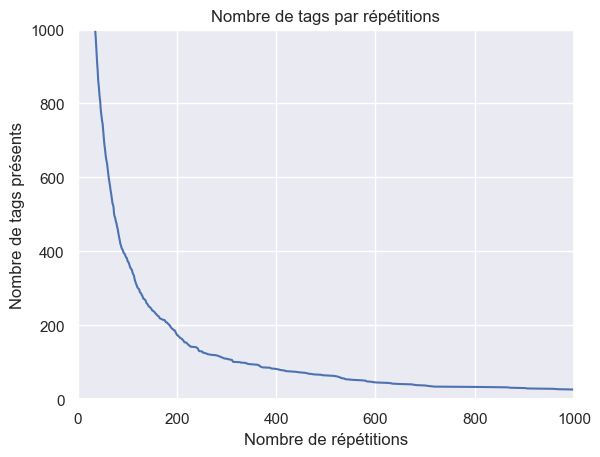

In [73]:
df_count_tags = pd.DataFrame(list_tag, columns= ['count'])

df_count_tags = df_count_tags.groupby('count', sort = False).agg(
    n_tags= ('count','count'),     #number of words counted
    ).reset_index()
df_count_tags['n_tags_cum'] = df_count_tags['n_tags'].cumsum() #cumulated sum of counted words

plt.plot(df_count_tags['count'], df_count_tags['n_tags_cum'], )
plt.title('Nombre de tags par répétitions')
plt.xlabel('Nombre de répétitions')
plt.ylabel('Nombre de tags présents')
plt.xlim(0,1_000)
plt.ylim(0,1_000)
plt.show

In [74]:
# list most frequent tags => 100 Firsts tags
list_most_frequent_tags = list_tag.iloc[0:100].index
list_most_frequent_tags

Index(['java', 'javascript', 'python', 'c#', 'android', 'html', 'ios',
       'jquery', '.net', 'php', 'c++', 'css', 'sql', 'spring', 'linux',
       'node.js', 'asp.net', 'json', 'objective-c', 'iphone', 'c',
       'sql-server', 'mysql', 'string', 'arrays', 'windows', 'reactjs',
       'pandas', 'asp.net-mvc', 'python-3.x', 'swift', 'xcode', 'database',
       'ajax', 'bash', 'django', 'spring-boot', 'angular', 'image',
       'hibernate', 'wpf', 'typescript', 'unit-testing', 'dataframe', 'numpy',
       'eclipse', 'rest', 'shell', 'performance', 'macos', 'postgresql',
       'laravel', 'http', 'visual-studio', 'jpa', 'git', 'xml',
       'twitter-bootstrap', 'ruby-on-rails', 'maven', 'angularjs', 'datetime',
       'spring-mvc', 'list', 'multithreading', 'google-chrome', 'file',
       'ubuntu', 'python-2.7', 'cocoa-touch', 't-sql', 'ssl', 'date', 'unix',
       'entity-framework', 'winforms', 'docker', 'android-studio', 'oracle',
       'ruby', 'forms', 'apache', 'selenium', 'matpl

## Filter only 100 most frequent tags

In [75]:
df['filtered_tag'] = np.empty((len(df), 0)).tolist()
#df['filtered_tag']= ''
for i, tag in enumerate (df['Tags']):
    new_list = []
    for w in df['Tags'][i]:
        if w in list_most_frequent_tags:
            new_list += [[w]]
        if len(new_list)>0:
            df.loc[i, 'filtered_tag'] = new_list


In [76]:
# how many question with empty tags
df_empty_tags = df.loc[df['filtered_tag'].map(len) == 0]
print(f"{len(df_empty_tags)} questions sans tags")

2397 questions sans tags


In [77]:
df_empty_tags

,Id,Title_body,title_body_cleaned,Tags,nb_words_questions,filtered_tag
182,3297048,403 Forbidden vs 401 Unauthorized HTTP respons...,http web page exist user proper user group pro...,"[http-headers, http-status-code-403, http-stat...",11,[]
216,4897685,How do I register a DLL file on Windows 7 64-b...,dll file window bit tri use follow code,"[dll, windows-7, 64-bit, regsvr32, dllregistra...",8,[]
282,1673967,How to run an EXE file in PowerShell with para...,run exe file paramet run follow command,"[powershell, parameters, quotes, exe, spaces]",7,[]
326,88235,"Dealing with ""java.lang.OutOfMemoryError: Perm...",java lang space error recent error web applic,"[exception, memory-leaks, out-of-memory, java-...",8,[]
333,234564,Tab key == 4 spaces and auto-indent after curl...,tab key auto make never use tab convert tab ba...,"[vim, whitespace, indentation, vi, auto-indent]",16,[]
...,...,...,...,...,...,...
49541,69370491,You can't sign in from this screen because thi...,screen app googl embed work websit websit opti...,"[webview, oauth-2.0, oauth, google-oauth, goog...",12,[]
49548,47250791,How do I dynamically set validations fields in...,dynam set field use librari valid field base v...,"[validation, vue.js, vuejs2, vuetify.js, vueli...",20,[]
49561,17185151,how to obtain a single channel value image fro...,singl valu imag imag opencv opencv use opencv ...,"[opencv, image-processing, computer-vision, co...",18,[]
49565,3014855,"How to create a ""dependency graph"" for IT asse...",creat depend graph one tri creat matrix variou...,"[documentation, resources, mapping, enterprise...",11,[]


In [78]:
# dataframe drop questions with empty tags
df.drop(df_empty_tags.index, inplace=True)

In [79]:
df.head()

,Id,Title_body,title_body_cleaned,Tags,nb_words_questions,filtered_tag
0,2003505,How do I delete a Git branch locally and remot...,delet git fail delet remot,"[git, version-control, git-branch, git-push, g...",5,[git]
1,16956810,How can I find all files containing a specific...,find file contain specif text string linux fin...,"[linux, text, grep, directory, find]",16,[linux]
2,1125968,"How do I force ""git pull"" to overwrite local f...",forc git local file forc local file git local ...,"[git, version-control, overwrite, git-pull, gi...",13,[git]
3,4366730,How do I check if a string contains a specific...,check string contain specif word,"[php, string, substring, contains, string-matc...",5,"[php, string]"
4,20035101,"Why does my JavaScript code receive a ""No 'Acc...",javascript code receiv access control allow or...,"[javascript, jquery, cors, postman, same-origi...",26,"[javascript, jquery]"


# New analysis

## Duplicate

In [80]:
for col in df.columns :
    n = df.duplicated(subset=col).sum()
    print(f"col : {col} -> duplicated : {n}")

col : Id -> duplicated : 0
col : Title_body -> duplicated : 0
col : title_body_cleaned -> duplicated : 6
col : Tags -> duplicated : 1741
col : nb_words_questions -> duplicated : 47115
col : filtered_tag -> duplicated : 39958


In [81]:
df[df.duplicated(subset='title_body_cleaned')]

,Id,Title_body,title_body_cleaned,Tags,nb_words_questions,filtered_tag
8899,12305566,What is the iOS 6 user agent string? What is t...,io user string io user string,"[iphone, ios, ipad, user-agent, ios6]",6,"[iphone, ios]"
30533,5060479,"How to use NuGet? I have installed NuGet, how ...",use instal use,"[c#, .net, winforms, visual-studio, nuget]",3,"[c#, .net, winforms, visual-studio]"
38646,51143206,Difference between tensor.permute and tensor.v...,differ view differ view,"[python, multidimensional-array, deep-learning...",4,[python]
41658,11984029,Difference between &#32; and &nbsp; Can any on...,differ one explain differ,"[java, html, string, jsp, ascii]",4,"[java, html, string]"
44256,8863888,How do I install JSLint on Ubuntu? How do I in...,instal ubuntu instal ubuntu,"[javascript, linux, vim, ubuntu, jslint]",4,"[javascript, linux, ubuntu]"
45178,3038571,What's the purpose of GC.SuppressFinalize(this...,method follow code,"[c#, .net, garbage-collection, idisposable, su...",3,"[c#, .net]"


## Len questions & Tags

In [82]:
df["_len_questions"] = df.title_body_cleaned.str.len()
df["_len_tags"] = df['filtered_tag'].apply(lambda x: len(' '.join(x))) #df.filtered_tag.str.len()
df

,Id,Title_body,title_body_cleaned,Tags,nb_words_questions,filtered_tag,_len_questions,_len_tags
0,2003505,How do I delete a Git branch locally and remot...,delet git fail delet remot,"[git, version-control, git-branch, git-push, g...",5,[git],26,3
1,16956810,How can I find all files containing a specific...,find file contain specif text string linux fin...,"[linux, text, grep, directory, find]",16,[linux],99,5
2,1125968,"How do I force ""git pull"" to overwrite local f...",forc git local file forc local file git local ...,"[git, version-control, overwrite, git-pull, gi...",13,[git],76,3
3,4366730,How do I check if a string contains a specific...,check string contain specif word,"[php, string, substring, contains, string-matc...",5,"[php, string]",32,10
4,20035101,"Why does my JavaScript code receive a ""No 'Acc...",javascript code receiv access control allow or...,"[javascript, jquery, cors, postman, same-origi...",26,"[javascript, jquery]",174,17
...,...,...,...,...,...,...,...,...
49582,53380318,Problem about Background transparent .png form...,problem background png format opencv python op...,"[python, python-3.x, image, opencv, png]",20,"[python, python-3.x, image]",134,23
49583,33300021,How I get the HTTP responses from bash script ...,get http bash script curl command follow comma...,"[linux, bash, http, curl, sh]",10,"[linux, bash, http]",61,15
49584,19290248,Cannot cast type numeric to boolean Postgres g...,cannot type postgr give error,"[sql, postgresql, casting, ddl, alter-table]",5,"[sql, postgresql]",29,14
49585,41603584,Sqlalchemy - add columns to a query For exampl...,add column queri exampl use databas would like...,"[python, python-3.x, flask, sqlalchemy, flask-...",12,"[python, python-3.x]",74,17


<function matplotlib.pyplot.show(close=None, block=None)>

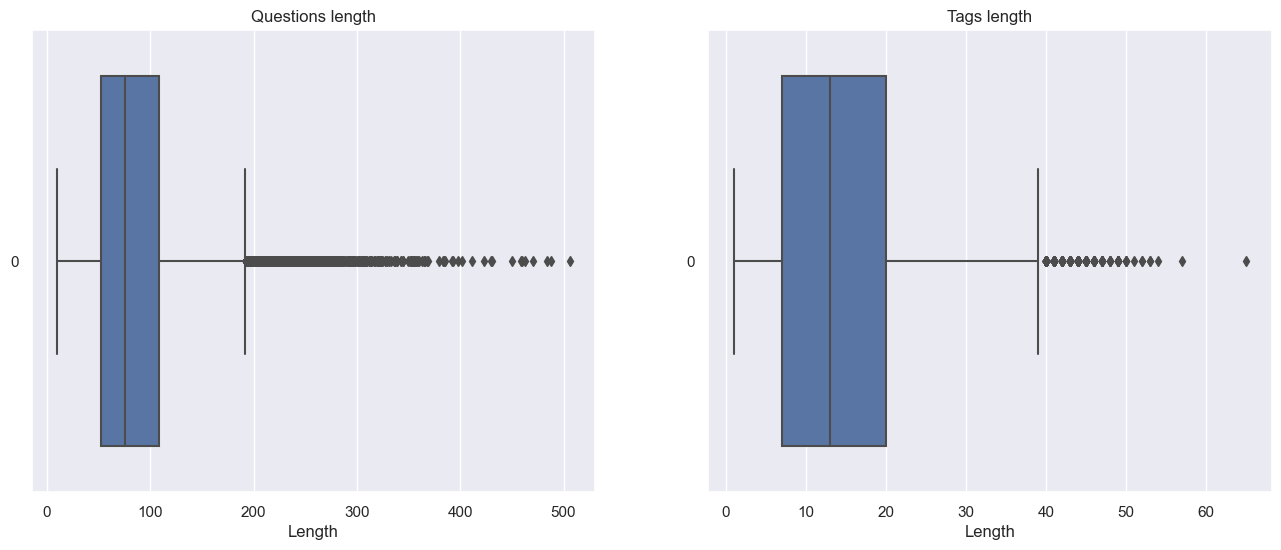

In [83]:
sns.set()
fig = plt.figure(figsize=(16, 6))

ax = fig.add_subplot(1,2,1)
ax = sns.boxplot(df["_len_questions"], orient='h')
ax = plt.xlabel('Length')
ax = plt.title('Questions length')

ax = fig.add_subplot(1,2,2)
ax = sns.boxplot(df["_len_tags"], orient='h')
ax = plt.xlabel('Length')
ax = plt.title('Tags length')

plt.show

## Exploratory Data Analysis

In [84]:
df.describe()

,Id,nb_words_questions,_len_questions,_len_tags
count,4.719000e+04,47190.000000,47190.000000,47190.000000
mean,2.193458e+07,14.478195,84.878491,14.467959
std,1.764882e+07,7.845748,46.389018,8.747616
min,4.000000e+00,3.000000,10.000000,1.000000
25%,6.727008e+06,9.000000,52.000000,7.000000
50%,1.791809e+07,13.000000,76.000000,13.000000
75%,3.424212e+07,18.000000,108.000000,20.000000
max,7.643531e+07,88.000000,506.000000,65.000000


## Multivariate analysis

In [85]:
df.select_dtypes(include = np.number)

,Id,nb_words_questions,_len_questions,_len_tags
0,2003505,5,26,3
1,16956810,16,99,5
2,1125968,13,76,3
3,4366730,5,32,10
4,20035101,26,174,17
...,...,...,...,...
49582,53380318,20,134,23
49583,33300021,10,61,15
49584,19290248,5,29,14
49585,41603584,12,74,17


In [86]:
corr = df.select_dtypes(include = np.number).corr()
corr

,Id,nb_words_questions,_len_questions,_len_tags
Id,1.000000,0.041571,0.046083,0.137069
nb_words_questions,0.041571,1.000000,0.987756,0.074259
_len_questions,0.046083,0.987756,1.000000,0.083218
_len_tags,0.137069,0.074259,0.083218,1.000000


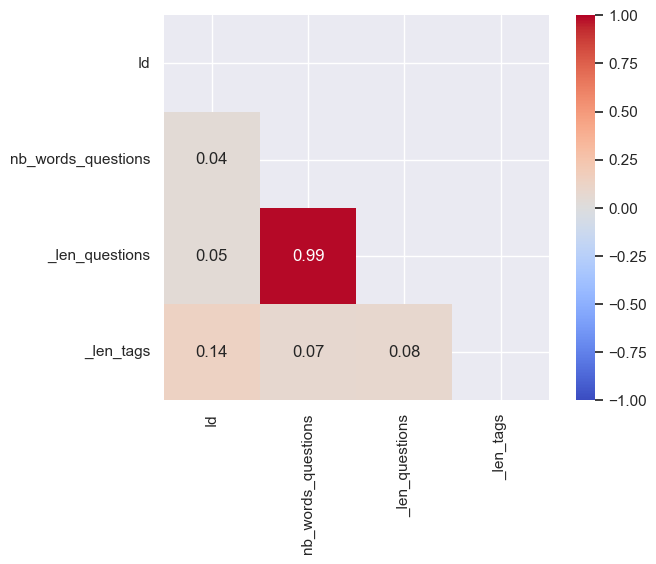

In [87]:
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(1,1, figsize=(7, 5))
ax = sns.heatmap(corr, mask=mask, vmin=-1, vmax=1, cmap="coolwarm", annot=True, fmt=".2f", square=True)

C:\Users\Sebastien\anaconda3\envs\Downgrade_python\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


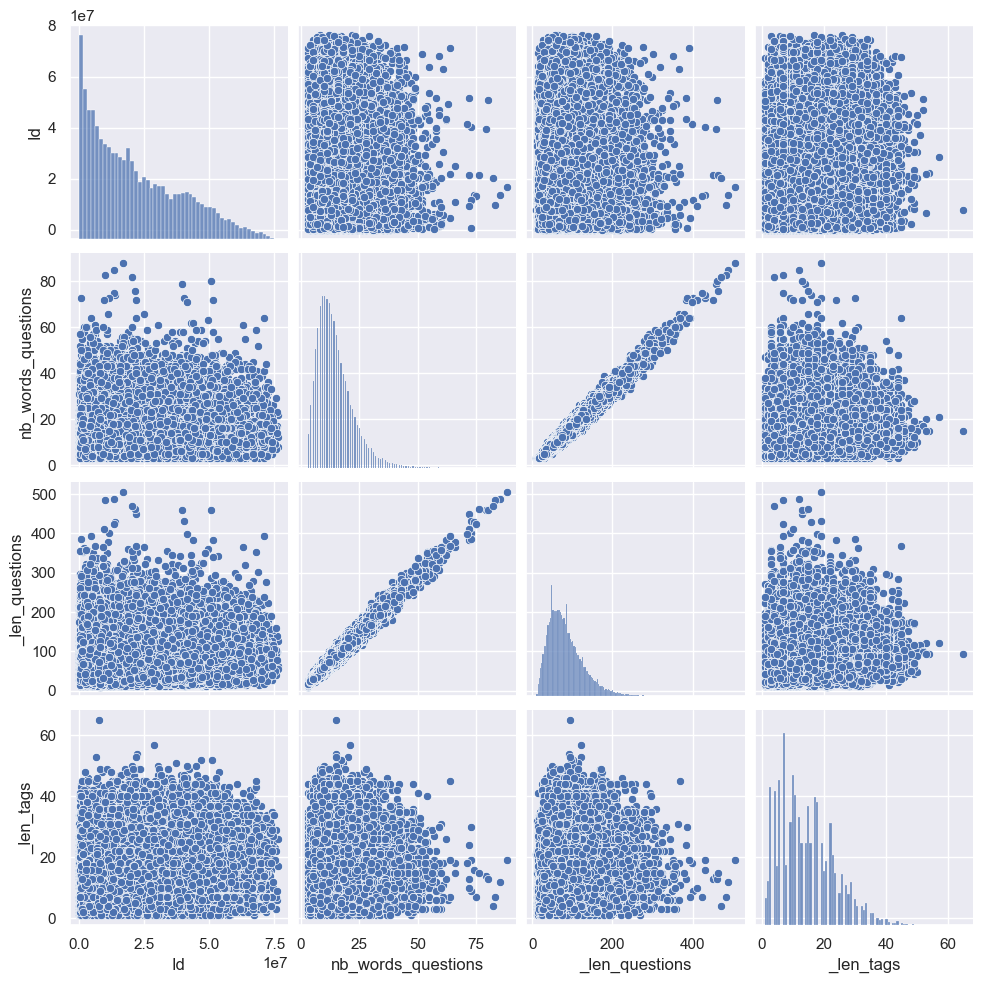

In [88]:
sns.pairplot(df)

# Wordcloud

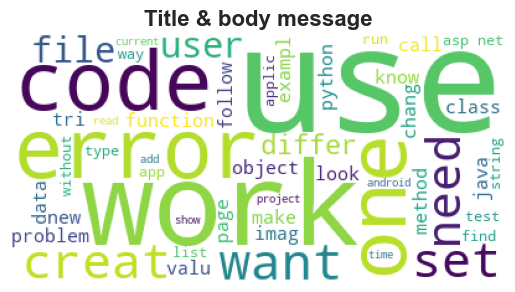

In [89]:
wordcloud_question = WordCloud(background_color='white',
                      #stopwords=[],
                      max_words= 50,
                      relative_scaling= 'auto',
                      ranks_only=None).generate(" ".join(df.title_body_cleaned.values))
plt.imshow(wordcloud_question)
plt.axis("off")
plt.title("Title & body message", fontsize= 16, fontweight="bold")
plt.show()

In [90]:
tag_list = df['filtered_tag'].apply(lambda x: ' '.join(x)).tolist()  # Liste des tags

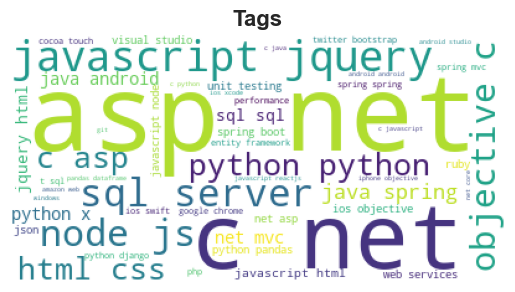

In [91]:
wordcloud_tag = WordCloud(background_color='white',
                      #stopwords=[],
                      max_words= 50,
                      relative_scaling= 'auto',
                      ranks_only=None).generate(" ".join(pd.Series(tag_list).values))
plt.imshow(wordcloud_tag)
plt.axis("off")
plt.title("Tags", fontsize= 16, fontweight="bold")
plt.show()

# Export database

In [92]:
df = df[['Id', 'Title_body', 'title_body_cleaned', 'Tags', 'filtered_tag']]
df.head()

,Id,Title_body,title_body_cleaned,Tags,filtered_tag
0,2003505,How do I delete a Git branch locally and remot...,delet git fail delet remot,"[git, version-control, git-branch, git-push, g...",[git]
1,16956810,How can I find all files containing a specific...,find file contain specif text string linux fin...,"[linux, text, grep, directory, find]",[linux]
2,1125968,"How do I force ""git pull"" to overwrite local f...",forc git local file forc local file git local ...,"[git, version-control, overwrite, git-pull, gi...",[git]
3,4366730,How do I check if a string contains a specific...,check string contain specif word,"[php, string, substring, contains, string-matc...","[php, string]"
4,20035101,"Why does my JavaScript code receive a ""No 'Acc...",javascript code receiv access control allow or...,"[javascript, jquery, cors, postman, same-origi...","[javascript, jquery]"


In [93]:
df.shape

(47190, 5)

In [94]:
df.to_csv("data/cleaned/df_text_processing_2.csv", index=False)